In [86]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
def comp_class_accuracy(npy_path):
    # Read in the test result of model
    result = np.load(npy_path);
    pred_labels = result[0,:,:];
    real_labels = result[1,:,:];
    class_acc = np.zeros(10)
    for m_class in xrange(10):
        class_acc[m_class] = np.mean(np.equal(np.argmax(pred_labels[np.argmax(real_labels, axis=1)==m_class],axis=1),m_class)); 
    return class_acc

def plot_class_accuracy(class_acc):
    plt.figure();
    plt.plot(class_acc);
    plt.title("Accuracy of different classes")
    plt.xlabel("Class");
    plt.ylabel("Accuracy");
    plt.show()    


In [88]:
noise_free_npy = "../result/blk5_fc512_b64/result.npy"
nf_acc = comp_class_accuracy(noise_free_npy);

In [89]:
n_std8_npy = "../result/blk5_fc512_b64/noisy_image/n_std_8/result.npy"
n_std32_npy = "../result/blk5_fc512_b64/noisy_image/n_std_32/result.npy"
n_std128_npy = "../result/blk5_fc512_b64/noisy_image/n_std_128/result.npy"
n_std8_acc= comp_class_accuracy(n_std8_npy);
n_std32_acc= comp_class_accuracy(n_std32_npy);
n_std128_acc= comp_class_accuracy(n_std128_npy);

In [102]:
# Misclassified matrix
result = np.load("../result/blk5_fc512_b64/result.npy");
pred_labels = result[0,:,:];
real_labels = result[1,:,:];
target = 6;
error_matrix = np.zeros((10,10));
for j in xrange(10):
    for i in xrange(10):
        if i == j:
            continue;
        error_matrix[j,i] = np.sum(np.equal(np.argmax(pred_labels[np.argmax(real_labels, axis=1)==j],axis=1),i));

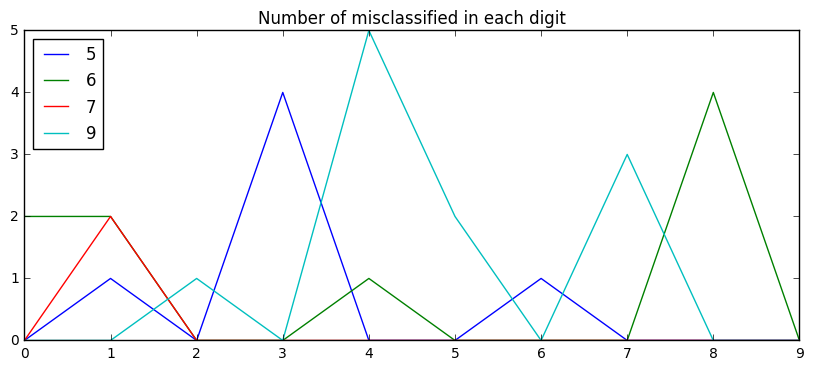

In [122]:
plt.figure(figsize=(10,4))
for i in [5,6,7,9]:
    plt.plot(xrange(10),error_matrix[i],label='%d' % i);
plt.title('Number of misclassified in each digit')
plt.legend(loc='upper left')
plt.show()

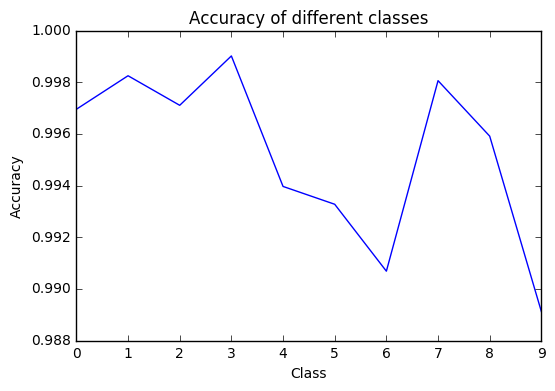

In [90]:
# Noise free class accuracy
plot_class_accuracy(nf_acc)

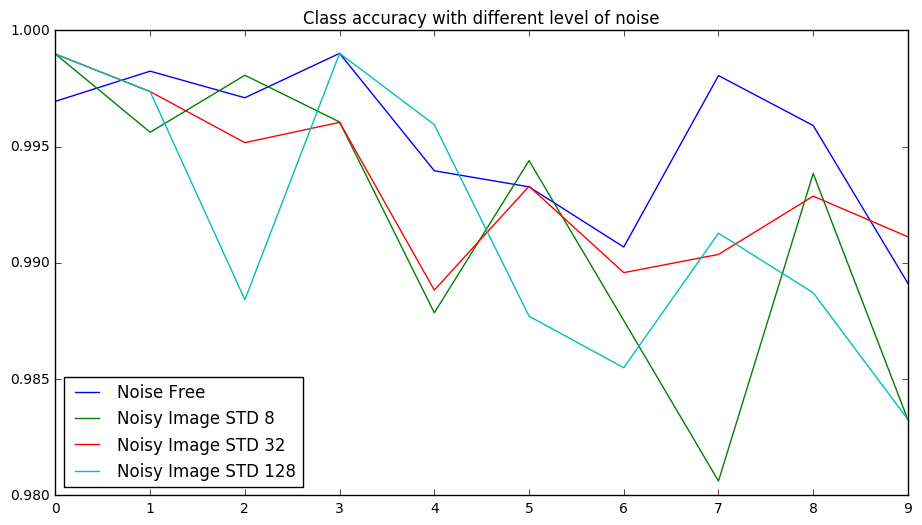

In [91]:
# Noisy Image
plt.figure(figsize=(11,6));
plt.plot([0,1,2,3,4,5,6,7,8,9], nf_acc,label='Noise Free');
plt.plot([0,1,2,3,4,5,6,7,8,9], n_std8_acc,label='Noisy Image STD 8');
plt.plot([0,1,2,3,4,5,6,7,8,9], n_std32_acc, label='Noisy Image STD 32')
plt.plot([0,1,2,3,4,5,6,7,8,9], n_std128_acc, label='Noisy Image STD 128')
plt.legend(loc='lower left')
plt.title("Class accuracy with different level of noise");
plt.show()

In [92]:
print np.mean(n_std8_acc), np.mean(n_std32_acc),np.mean(n_std8_acc)

0.991624342972 0.993365062445 0.991624342972


In [66]:
n_per5_npy = "../result/blk5_fc512_b64/noisy_label/n_percent_5/result.npy"
n_per15_npy = "../result/blk5_fc512_b64/noisy_label/n_percent_15/result.npy"
n_per50_npy = "../result/blk5_fc512_b64/noisy_label/n_percent_50/result.npy"
n_per5_acc= comp_class_accuracy(n_per5_npy);
n_per15_acc= comp_class_accuracy(n_per15_npy);
n_per50_acc= comp_class_accuracy(n_per50_npy);

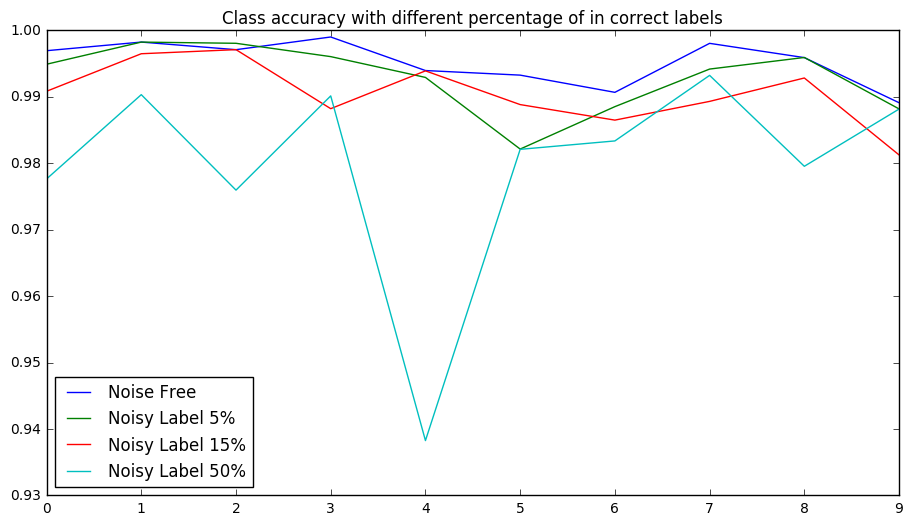

In [77]:
# Noisy Label
plt.figure(figsize=(11,6));
plt.plot([0,1,2,3,4,5,6,7,8,9], nf_acc,label='Noise Free');
plt.plot([0,1,2,3,4,5,6,7,8,9], n_per5_acc,label='Noisy Label 5%');
plt.plot([0,1,2,3,4,5,6,7,8,9], n_per15_acc, label='Noisy Label 15%')
plt.plot([0,1,2,3,4,5,6,7,8,9], n_per50_acc, label='Noisy Label 50%')
plt.title("Class accuracy with different percentage of in correct labels");
plt.legend(loc='lower left')
plt.show()